# Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [9]:
df.columns.values[0] = "SrNo"
df

,SrNo,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Visulation

<AxesSubplot:>

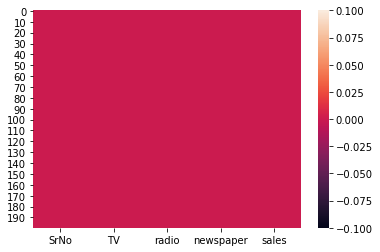

In [10]:
sns.heatmap(df.isnull())

There is no null values in the dataset

<AxesSubplot:ylabel='Frequency'>

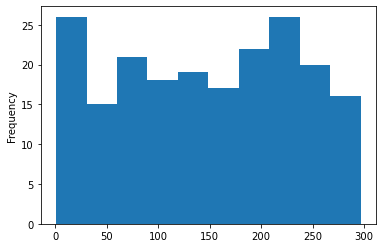

In [11]:
df["TV"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

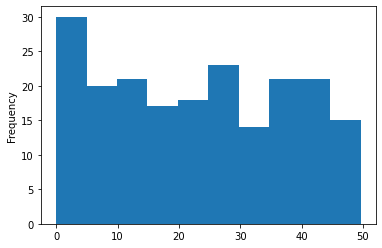

In [12]:
df["radio"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

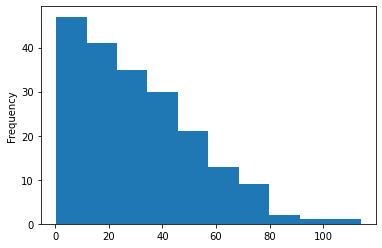

In [13]:
df["newspaper"].plot.hist()

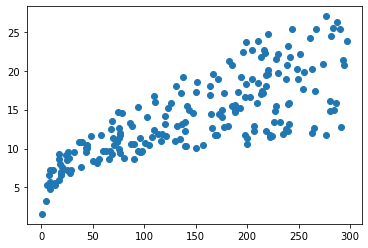

In [14]:
plt.scatter(data = df,x = "TV",y = "sales")
plt.show()

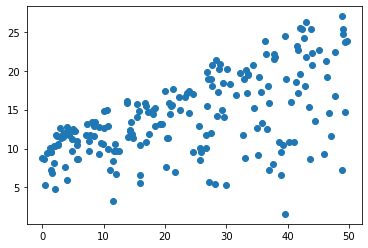

In [15]:
plt.scatter(data = df,x = "radio",y = "sales")
plt.show()

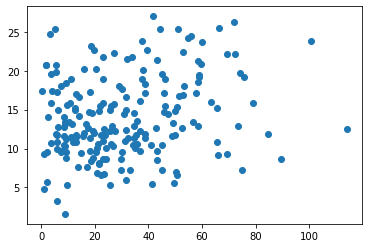

In [16]:
plt.scatter(data = df,x ="newspaper",y = "sales")
plt.show()

<AxesSubplot:xlabel='TV', ylabel='sales'>

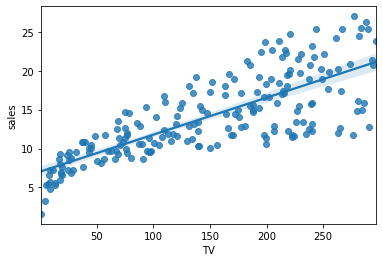

In [17]:
sns.regplot(data = df,x = "TV",y = "sales")

<AxesSubplot:xlabel='radio', ylabel='sales'>

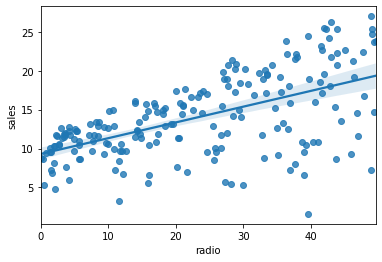

In [18]:
sns.regplot(data = df,x ="radio",y = "sales")

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

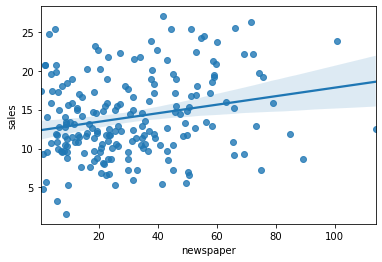

In [19]:
sns.regplot(data = df,x = "newspaper",y ="sales")

<AxesSubplot:xlabel='TV', ylabel='Density'>

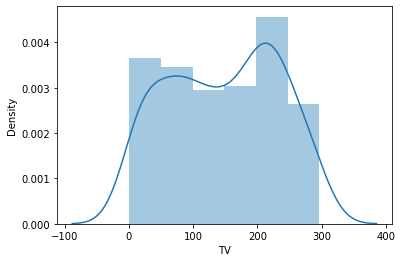

In [20]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

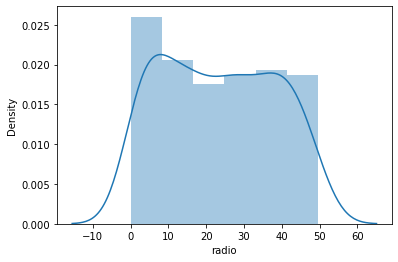

In [21]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

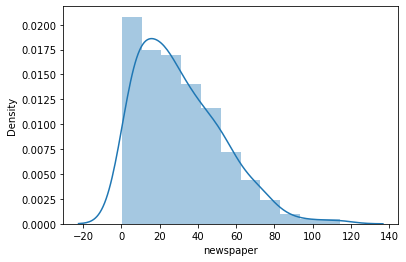

In [22]:
sns.distplot(df["newspaper"])

In [23]:
corr = df.corr()
corr

,SrNo,TV,radio,newspaper,sales
SrNo,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


array([<AxesSubplot:title={'center':'SrNo'}>,
       <AxesSubplot:title={'center':'TV'}>,
       <AxesSubplot:title={'center':'radio'}>,
       <AxesSubplot:title={'center':'newspaper'}>,
       <AxesSubplot:title={'center':'sales'}>], dtype=object)

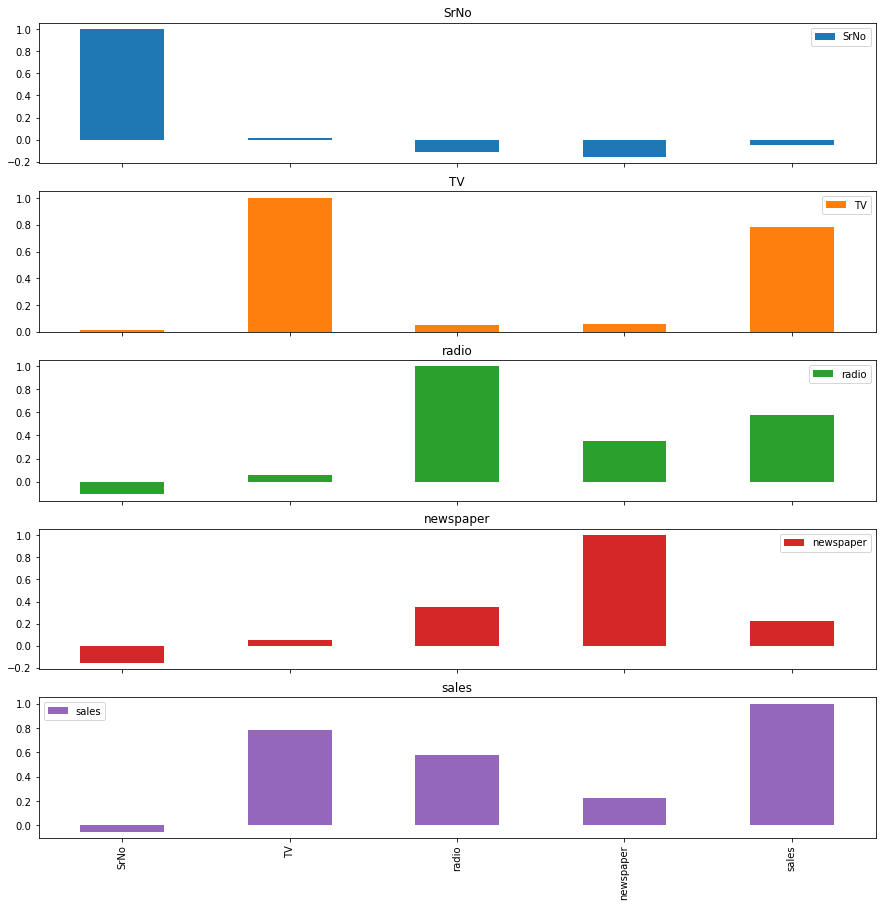

In [24]:
corr.plot(kind = "bar",subplots = True,figsize = (15,15))

<AxesSubplot:>

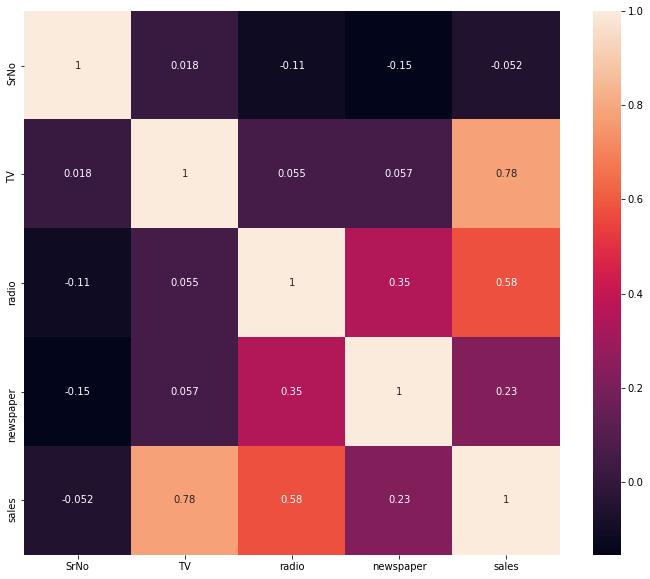

In [25]:
corr_map = df.corr()
plt.figure(figsize= (12,10))
sns.heatmap(corr_map,annot = True)

# Correlation Outcome
some of the columns in dataset are positively and some are negatively correlated.unnamed has -52 percent correlation with target column sales which can be considered has weak bond. TV has 78 percent correlation with target column sales which can be considered has strong bond.radio has 58 percent correltion with target column sales which can be considerd has good bond.newspaper has 23 percent correlation with target column sales which can be considered has good bond

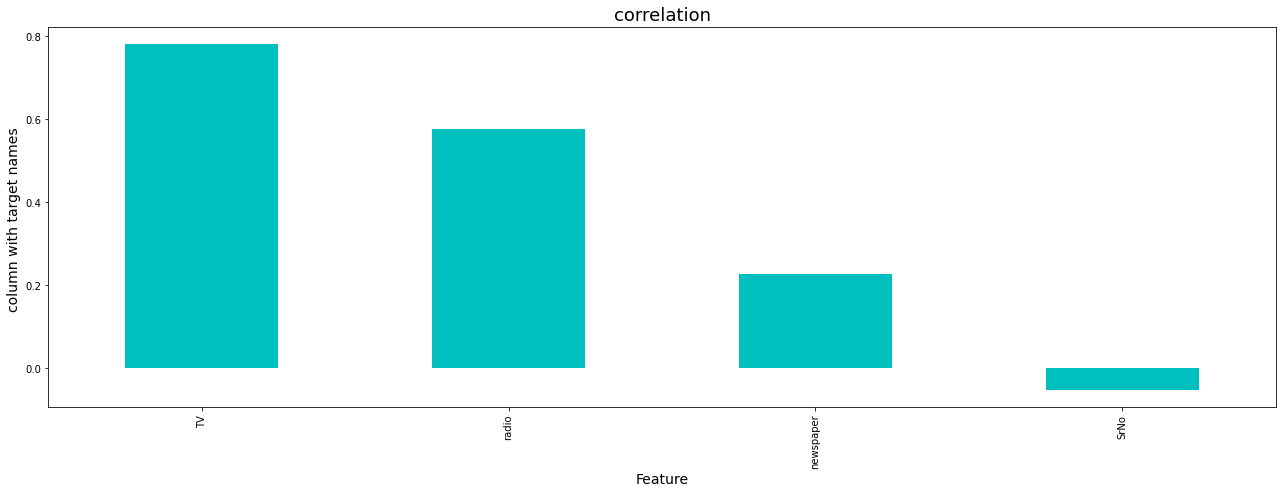

In [26]:
plt.figure(figsize = (22,7))
df.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind ='bar',color ='c')
plt.xlabel('Feature',fontsize = 14)
plt.ylabel("column with target names ",fontsize= 14)
plt.title("correlation",fontsize = 18)
plt.show()

# plotting the outliers

In [27]:
df.skew()

SrNo         0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

SrNo            AxesSubplot(0.125,0.125;0.133621x0.755)
TV           AxesSubplot(0.285345,0.125;0.133621x0.755)
radio         AxesSubplot(0.44569,0.125;0.133621x0.755)
newspaper    AxesSubplot(0.606034,0.125;0.133621x0.755)
sales        AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

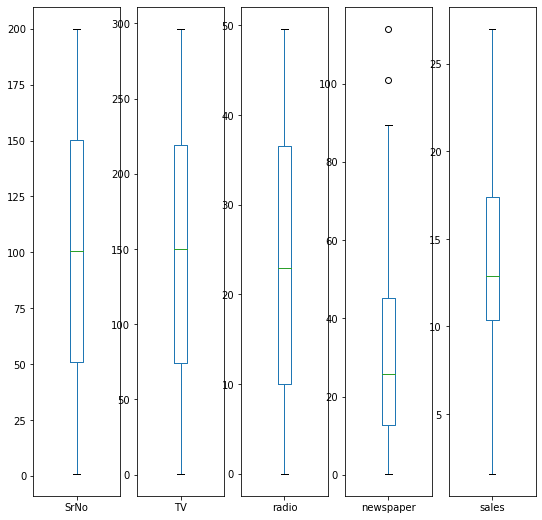

In [28]:
df.plot(kind = 'box',subplots = True,figsize =(9,9))

# Removing the outliers 

In [29]:
from scipy.stats import zscore
z  = np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [30]:
thresold = 3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [31]:
df_new = df[(z<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(200, 5)
(198, 5)


# Percentage of data loss

In [32]:
loss_percent =(200-198)/200*100
print(loss_percent)

1.0


In [33]:
df1 = df_new.iloc[:,1:]
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [35]:
x.shape

(198, 3)

In [36]:
y.shape

(198,)

In [37]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method = "yeo-johnson")

In [38]:
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .33,random_state =55)

In [41]:
x_train.shape

(132, 3)

In [42]:
y_train.shape

(132,)

In [43]:
x_test.shape

(66, 3)

In [44]:
y_test.shape

(66,)

In [45]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 4.00260141,  2.71769783, -0.01104005])

In [46]:
lr.intercept_

13.986864039315513

In [47]:
lr.score(x_train,y_train)

0.8991131225524167

In [48]:
pred = lr.predict(x_test)
pred

array([11.96445233, 15.88668424, 20.79264   , 15.02284213,  9.39520437,
       12.01714059, 15.37818382, 17.00264625, 18.63570565, 20.38157015,
       23.33879198, 13.99851149,  9.77238034,  7.72534346, 18.41427635,
        4.45067841,  7.64121769, 21.24668558, 13.32813477, 17.42852563,
       15.43214036, 20.37180974, 22.44750856, 12.09121781, 10.84144097,
        9.96773494, 12.76286702, 19.47442672, 19.5761546 ,  3.51305767,
       12.99484833, 13.21318963,  8.28125176, 11.47814514, 13.32482452,
       10.05896494, 23.05711861, 16.39423813, 20.75268069, 13.14729077,
       20.27832689, 10.55032201,  6.02569017, 17.5793319 , 17.74553534,
       18.62129901, 15.99848655, 17.67492619,  9.76712994,  5.2788754 ,
       12.35809417, 19.20603045, 10.05384932,  2.28626822, 22.65039716,
       10.81872399,  9.13392783, 15.85464946, 19.41080562, 12.65067621,
        3.65221948, 16.96705379, 10.11179784, 21.05343362, 21.346376  ,
       14.42232709])

In [49]:
print("Print the predicted values",pred)

Print the predicted values [11.96445233 15.88668424 20.79264    15.02284213  9.39520437 12.01714059
 15.37818382 17.00264625 18.63570565 20.38157015 23.33879198 13.99851149
  9.77238034  7.72534346 18.41427635  4.45067841  7.64121769 21.24668558
 13.32813477 17.42852563 15.43214036 20.37180974 22.44750856 12.09121781
 10.84144097  9.96773494 12.76286702 19.47442672 19.5761546   3.51305767
 12.99484833 13.21318963  8.28125176 11.47814514 13.32482452 10.05896494
 23.05711861 16.39423813 20.75268069 13.14729077 20.27832689 10.55032201
  6.02569017 17.5793319  17.74553534 18.62129901 15.99848655 17.67492619
  9.76712994  5.2788754  12.35809417 19.20603045 10.05384932  2.28626822
 22.65039716 10.81872399  9.13392783 15.85464946 19.41080562 12.65067621
  3.65221948 16.96705379 10.11179784 21.05343362 21.346376   14.42232709]


In [50]:
print("Mean absolute error:", mean_absolute_error(y_test,pred))
print("Mean squared error :",mean_squared_error(y_test,pred))
print("Root mean sqaure:",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 1.293092943875033
Mean squared error : 2.6399339106374247
Root mean sqaure: 1.6247873432044653


In [51]:
print("R2 score:",r2_score(y_test,pred))

R2 score: 0.9133244952425986


In [52]:
from sklearn.model_selection import cross_val_score


score  = cross_val_score(lr,x,y,cv = 2)
print(score)
print(score.mean())
print(score.std())

[0.91408144 0.8893314 ]
0.9017064197605746
0.01237501871647112


In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
pred = lr.predict(x_train)
print("predicted result score:",pred)
print("Actual score:",y_test)

predicted result score: [15.25052837 12.58949258 17.78388712 10.81989412  8.34665295 15.61724485
 18.46587056 21.5755529  18.3058554  13.26229941 14.44461207 15.70643486
 12.35964013 12.15314793 15.07733698 13.81130883 14.58907333 12.81853747
 13.4756473  20.4354295   9.31405859  6.00906294  7.20488776 15.01944146
 12.04992326 19.811929    7.27858622 21.38180019 15.39160828 10.03214107
 10.53983476 15.08306    13.57378997 16.94774927 19.04298663  9.46649007
 17.85870516 13.54903095  9.94896558 20.34681687 13.81735395  9.56926468
 23.72096008 10.79953408  8.63773324 11.24010518 12.40769146 18.14373478
 18.45265514 11.40269261 15.56703807 11.88220952 10.2153337   7.74321981
 13.80214328 15.46536409 19.60667116 16.73598085 10.7926984   6.62560023
  8.68487775 20.42932036  8.41229465 18.69049493  3.53948148 20.49710992
 17.64745095 15.10651709 14.65968478 17.66290072  6.14039282  5.80114347
 16.9968528   1.90279223 13.99562864 16.92495238 11.11165086 10.3051546
 18.79569015 20.9300474   9.

In [55]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
rdg=Ridge(alpha=0.0001,random_state=55)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.899113122551847

In [56]:
rdg.coef_

array([ 4.00259814,  2.71769572, -0.01103956])

In [57]:
predict = rdg.predict(x_test)

In [58]:
predict

array([11.9644538 , 15.88668356, 20.792635  , 15.02284136,  9.39520858,
       12.01714153, 15.37818192, 17.00264365, 18.6357009 , 20.3815646 ,
       23.33878516, 13.99851126,  9.77238359,  7.72534817, 18.41427281,
        4.45068531,  7.64122323, 21.24667996, 13.3281348 , 17.42852261,
       15.43213882, 20.37180509, 22.44750208, 12.09121901, 10.84144364,
        9.96773799, 12.76286785, 19.47442131, 19.57614989,  3.51306577,
       12.99484871, 13.21319032,  8.28125517, 11.47814788, 13.3248242 ,
       10.05896801, 23.05711194, 16.39423536, 20.75267522, 13.14729194,
       20.27832103, 10.55032398,  6.02569603, 17.57932866, 17.7455314 ,
       18.62129605, 15.9984847 , 17.67492367,  9.76713354,  5.27888209,
       12.3580951 , 19.20602568, 10.0538523 ,  2.28627644, 22.65039065,
       10.81872605,  9.13393172, 15.85464851, 19.41080155, 12.65067728,
        3.65222776, 16.96705144, 10.11180168, 21.05342864, 21.34636981,
       14.42232634])

In [59]:
lso = Lasso(alpha = 0.0001,random_state = 45)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.8991131210536772

In [60]:
lso.coef_

array([ 4.00249843,  2.71756419, -0.01090427])

# Approaching more regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [62]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print("DTC Score:",dtr.score(x_train,y_train))

dtr_pred = dtr.predict(x_test)
print("r2_score:",r2_score(y_test,dtr_pred))
print("Mean Squared error:",mean_squared_error(y_test,dtr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,dtr_pred)))

DTC Score: 1.0
r2_score: 0.9573675578737927
Mean Squared error: 1.2984848484848481
Root Mean Squared error: 1.1395107934920354


In [63]:
print(dtr_pred)

[ 9.9 16.  19.7 11.8  7.2 10.9 12.3 14.8 15.  20.2 25.4 12.2  9.9  9.7
 15.   5.3  6.6 23.7 10.9 15.7 14.9 21.2 24.2  9.9  9.9 10.1 13.4 22.6
 19.8  7.3 12.9 13.2 10.9 10.4 12.9  8.7 22.1 12.3 21.7 15.3 20.2 11.6
  8.7 15.  17.  17.1 15.6 17.  11.3  8.7 11.6 19.8 10.1  5.7 22.1  8.8
 11.  14.9 20.1 12.9  6.7 15.2  8.8 22.1 21.8 15.2]


In [64]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR Score:",knr.score(x_train,y_train))

knr_pred = knr.predict(x_test)
print("r2_score:",r2_score(y_test,knr_pred))
print("Mean Squared error:",mean_squared_error(y_test,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,knr_pred)))

KNR Score: 0.9522987632111195
r2_score: 0.9255262474579534
Mean Squared error: 2.26829696969697
Root Mean Squared error: 1.506086640833445


In [65]:
print(knr_pred)

[10.66 16.7  20.12 12.12  8.2   6.6  12.64 15.84 17.26 18.94 22.16 12.26
 10.68  8.5  14.66  8.06  7.4  22.36  8.12 15.54 15.04 21.04 24.18 12.64
 11.18  9.92 13.18 21.   18.7   7.5  12.24 13.62 10.38  8.58 12.28  9.38
 22.16 12.7  22.04 13.94 21.26 10.88  8.86 12.98 16.76 20.18 15.08 17.14
 10.64  8.18 11.58 17.54  9.92  9.1  23.62  7.68 10.76 14.72 18.96 11.84
  7.04 16.3   8.58 22.16 21.56 14.4 ]


In [66]:
svr = SVR()
svr.fit(x_train,y_train)
print("SVR Score:",svr.score(x_train,y_train))

svr_pred = svr.predict(x_test)
print("r2_score:",r2_score(y_test,svr_pred))
print("Mean Squared error:",mean_squared_error(y_test,svr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,svr_pred)))

SVR Score: 0.9059379941587598
r2_score: 0.8891144822960985
Mean Squared error: 3.377314492767568
Root Mean Squared error: 1.8377471242713366


In [67]:
print(svr_pred)

[11.65965952 15.88839771 18.76399135 12.14052363  8.88384816 11.21624368
 13.26292008 15.56061337 15.6627581  19.09685825 19.64107592 12.23676743
 10.24697301  8.49198239 15.20047274  8.2969768   8.4302948  21.18735016
 12.24005423 15.72561968 14.77352685 20.6538364  21.56084473 11.80263523
 11.24832029  9.43954567 12.60840514 17.86957838 18.73380789  7.77063129
 12.40419279 13.17454022 10.50455995 10.66171256 12.6827997   9.29982423
 20.10613349 12.9981398  20.89872004 12.86388717 19.15712854 10.73112315
  8.67083596 14.24242785 17.11959993 18.31674678 15.64297362 16.88774882
 10.27938284  8.15680817 11.30743484 18.46492583  9.53348844 10.50835962
 20.66354424 10.09497295 10.33850305 14.88966182 19.80097195 12.12497496
  7.78793186 17.42395407  9.68633972 19.3676952  20.66524105 14.57111042]


In [68]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(x_train,y_train)
print("SGDRegressor score :",sgdr.score(x_train,y_train))

sgdr_pred = sgdr.predict(x_test)
print("r2_score:",r2_score(y_test,sgdr_pred))
print("Mean Squared error:",mean_squared_error(y_test,sgdr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,sgdr_pred)))

SGDRegressor score : 0.8990793038117568
r2_score: 0.9133909137918521
Mean Squared error: 2.63791095639031
Root Mean Squared error: 1.6241646949710211


In [69]:
print(sgdr_pred)

[11.93967483 15.86549487 20.75983296 15.00933235  9.38052629 11.97890328
 15.34773587 16.97261852 18.59139147 20.3360321  23.29904105 13.980636
  9.75929839  7.71357474 18.38613356  4.43833266  7.63572924 21.20116539
 13.28750881 17.39646837 15.4019031  20.3326497  22.40153731 12.06319201
 10.82902332  9.94660641 12.74241701 19.41587312 19.53584042  3.51687697
 12.97266427 13.19314514  8.25681884 11.4627385  13.29591562 10.03434666
 23.01706332 16.36349128 20.70637182 13.12659883 20.22474441 10.53251005
  6.02243818 17.54929971 17.69939657 18.59424507 15.9673371  17.64986542
  9.75695729  5.27901606 12.34313833 19.16077859 10.03261977  2.27874347
 22.60954343 10.78604999  9.12817227 15.83707785 19.37578178 12.63675725
  3.65784173 16.92942401 10.10031924 21.02038648 21.29612592 14.38829649]


In [70]:
from sklearn.model_selection import GridSearchCV


alphavalue = {"alpha":[1,0.1,0.01,0.001,0.0001]}
model = Ridge()

grid = GridSearchCV(estimator=model,param_grid = alphavalue)

grid.fit(x_test,y_test)
print (grid)


print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})
0.8969189470297868
1
{'alpha': 1}


In [71]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [72]:
from time import time
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [73]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [74]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(x_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.000s
	Explained variance: 0.9272357328635288
	Mean absolute error: 1.0342424242424246
	R2 score: 0.9255262474579534

GradientBoostingRegressor()
	Training time: 0.057s
	Prediction time: 0.069s
	Explained variance: 0.9841170992137115
	Mean absolute error: 0.5690165104989012
	R2 score: 0.9839345822986281

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.000s
	Explained variance: 0.9272357328635288
	Mean absolute error: 1.0342424242424246
	R2 score: 0.9255262474579534

ExtraTreesRegressor()
	Training time: 0.185s
	Prediction time: 0.016s
	Explained variance: 0.9906661596982248
	Mean absolute error: 0.4267272727272738
	R2 score: 0.9905934456445408

RandomForestRegressor()
	Training time: 0.251s
	Prediction time: 0.023s
	Explained variance: 0.9836520663302972
	Mean absolute error: 0.5759090909090914
	R2 score: 0.9835693871599634

DecisionTreeRegressor()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained

# Apporaching Ensemble Method

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators =100,random_state = 42)
rf.fit(x_train,y_train)
predict = rf.predict(x_test)

print(predict)
print("RFScore:",rf.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))


[11.839 15.48  20.318 11.871  6.121 11.123 12.52  15.315 15.182 20.107
 24.998 12.108 10.079  9.587 15.057  4.929  7.379 22.766 12.346 15.559
 14.892 22.5   24.327 11.929 11.437 10.373 13.242 21.472 19.444  7.374
 13.461 13.138 10.024 10.709 13.194  8.215 24.401 12.149 22.458 12.897
 20.045 11.133  8.836 14.259 16.89  18.606 15.297 16.577 10.764  8.649
 11.551 19.626 10.385  5.458 22.865  8.544 10.687 15.031 19.799 12.614
  6.908 16.711  8.524 21.612 22.675 14.374]
RFScore: 0.9955963701864239
r2_score: 0.9843016165158994


In [76]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50,random_state=42) #by default=100
ada.fit(x_train,y_train)
predict=ada.predict(x_test)

print(predict)
print("AdaBoostScore:",ada.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))

[12.35       15.48181818 20.07037037 12.3625      6.425      10.07083333
 13.02068966 15.04090909 14.87777778 20.07037037 24.805      12.53333333
 10.87241379 10.07083333 14.87777778  5.44444444  7.57272727 22.91875
 11.79473684 15.04090909 15.02173913 22.48333333 23.89545455 12.86
 11.61666667 10.175      13.02068966 21.53636364 19.60882353  8.
 13.03076923 13.74       10.5         9.88823529 13.02068966  7.71111111
 23.90882353 12.3625     22.225      13.51333333 20.11764706 11.87368421
 10.27       14.81818182 16.42       19.14727273 16.13333333 16.27692308
 11.61666667  9.85       12.3625     19.46666667 10.27        6.25714286
 21.71162791  8.41428571 10.895      15.04090909 19.60882353 12.53333333
  7.32727273 16.84        8.41428571 20.98888889 22.06842105 15.18157895]
AdaBoostScore: 0.9749381748905765
r2_score: 0.9692787462666865


In [77]:
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor() #by default=100
grad.fit(x_train,y_train)
predict=grad.predict(x_test)

print(predict)
print("Gradient Score:",grad.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))

[12.14447959 15.73914129 20.93257223 12.00077424  5.61932896 10.24904872
 12.63235213 15.1227884  14.9251396  20.39388782 25.34623565 12.07146525
 10.37503469  9.10115111 15.04962157  5.31645915  7.53418605 23.35652236
 11.1234907  15.64636074 14.66260908 22.83387913 25.06556859 11.90949258
 11.19793014  9.97775438 12.85640084 21.3443612  19.94780182  7.0230666
 13.09613081 12.46280758 10.03840079 10.198854   12.87969732  7.73261004
 24.36061357 12.2050757  23.42414771 13.42866539 20.05799797 11.1552689
  8.73514413 14.97666937 16.73725164 18.22779003 15.54024351 17.17223715
 10.89349546  8.20901945 11.49244316 19.79218109  9.82839539  5.44139453
 23.57122299  8.37209808 10.52844006 14.8757405  19.88359687 12.09824294
  6.5772476  16.29411707  8.33303502 20.59044379 22.60013782 14.67257007]
Gradient Score: 0.9989231558639313
r2_score: 0.9835572346384559


In [78]:
preddf = pd.DataFrame(data = dtr_pred)
preddf

,0
0,9.9
1,16.0
2,19.7
3,11.8
4,7.2
...,...
61,15.2
62,8.8
63,22.1
64,21.8


# Saving the best model

In [79]:
import joblib 
joblib.dump(dtr,'dtrmodel.obj')
dtrloadmodel = joblib.load('dtrmodel.obj')
dtrloadmodel.predict(x_test)

array([ 9.9, 16. , 19.7, 11.8,  7.2, 10.9, 12.3, 14.8, 15. , 20.2, 25.4,
       12.2,  9.9,  9.7, 15. ,  5.3,  6.6, 23.7, 10.9, 15.7, 14.9, 21.2,
       24.2,  9.9,  9.9, 10.1, 13.4, 22.6, 19.8,  7.3, 12.9, 13.2, 10.9,
       10.4, 12.9,  8.7, 22.1, 12.3, 21.7, 15.3, 20.2, 11.6,  8.7, 15. ,
       17. , 17.1, 15.6, 17. , 11.3,  8.7, 11.6, 19.8, 10.1,  5.7, 22.1,
        8.8, 11. , 14.9, 20.1, 12.9,  6.7, 15.2,  8.8, 22.1, 21.8, 15.2])

# Conclusion

In [80]:
a = np.array(y_test)
predicted = np.array(dtr.predict(x_test))
df_Ads = pd.DataFrame({"Original":a,"Predicted":predicted},index = range(len(a)))
df_Ads

,Original,Predicted
0,11.8,9.9
1,15.9,16.0
2,20.8,19.7
3,12.7,11.8
4,6.6,7.2
...,...,...
61,18.0,15.2
62,9.2,8.8
63,22.2,22.1
64,23.2,21.8
